In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
sys.path.append("..")
from semif_utils import watershed_segmentation, make_exg, make_kmeans, reduce_holes,dilate_erode,apply_mask
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.filters import rank
from skimage.color import label2rgb
from skimage.measure import label
from skimage.exposure import rescale_intensity
from scipy import ndimage
from skimage.filters import threshold_multiotsu

../Assets/Row2_1
random


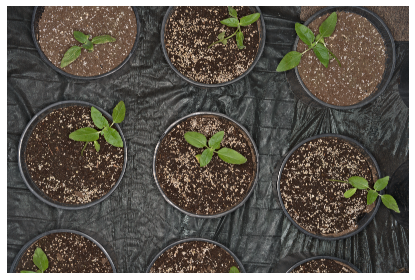

In [118]:
test_cutouts = Path("/home/admin_mkutugata/SemiF-AnnotationPipeline/data/data/trial/NC_2022-03-04/developed").glob("*.jpg")
test_cutouts = [str(x) for x in test_cutouts]
# imfpath = "../data/data/trial/NC_2022-03-29/developed/row2_3.jpg" # Good sample
# imfpath = "../data/data/trial/NC_2022-03-11/developed/row7_6.jpg" # Difficult grass sample 
# imfpath = "../data/data/trial/NC_2022-04-05/developed/row2_4.jpg" # Difficult sunflower
rint = random.randint(0, 20)

imfpath = test_cutouts[rint]

save_path = Path("../Assets/", Path(imfpath).stem)


if save_path == "../Assets/row2_3":
    img_type = "simple"

if save_path == "../Assets/row7_6":
    img_type = "grass"

if save_path == "../Assets/row2_4":
    img_type = "sunflower"
else:
    img_type = "random"

print(save_path)
print(img_type)

im = cv2.imread(imfpath)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)
# Create a Rectangle patch

plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_full.png", dpi=300, transparent=True, bbox_inches="tight")

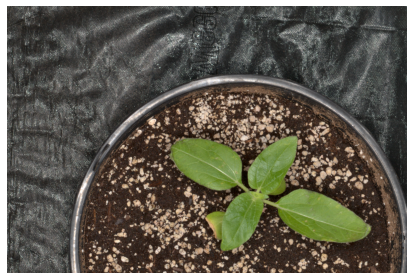

In [121]:
if img_type == "simple":
    img = im[2200:3500,4000:5000] # Good sample
elif img_type == "grass":
    img = im[2550:4050, 100:2050] # Difficult grass sample
elif img_type == "sunflower":
    img = im[900:1800,6000:7000] # Difficult sunflower
elif img_type == "random":
    # img = im[1700:3500, 2800:4300]
    img = im[2000:4000, 3000:6000]
# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(img)
# Create a Rectangle patch

plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_idv.png", dpi=300, transparent=True, bbox_inches="tight")

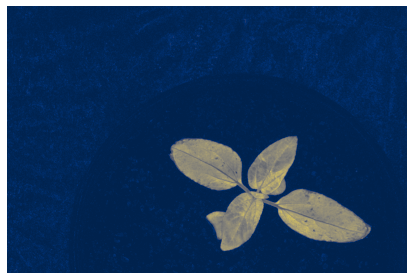

In [122]:
vi = make_exg(img, thresh=True)

plt.imshow(vi, cmap="cividis")
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_vi_idv.png", dpi=300, transparent=True, bbox_inches='tight')

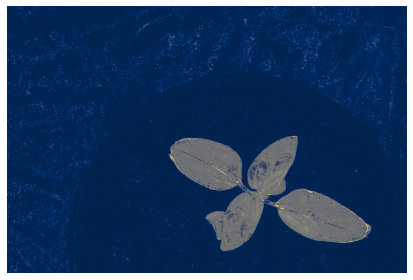

In [136]:
thresh_vi = np.where(vi <=0, 0, vi)
thresh_vi = np.where((thresh_vi > 20) & (thresh_vi < 100),
                             thresh_vi * 4, thresh_vi)
thresh_vi = np.where(thresh_vi >255, 255, thresh_vi)



plt.axis(False)
plt.imshow(thresh_vi, cmap="cividis")
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_vi_idv_thresholding.png", dpi=300, transparent=True, bbox_inches='tight')

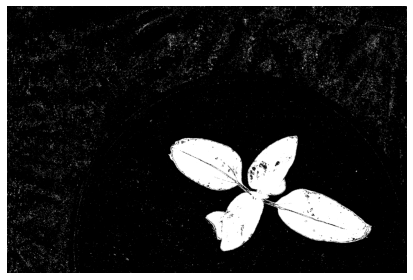

In [137]:
kmeans = make_kmeans(thresh_vi)

plt.imshow(kmeans, cmap ="gray")
plt.axis(False)
plt.tight_layout()
# plt.savefig(f"{save_path}_{img_type}_kmeans_idv.jpg", dpi=300, transparent=True, bbox_inches = "tight")

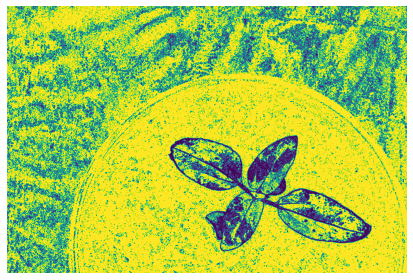

In [138]:
markers = rank.gradient(thresh_vi, disk(1)) < 12
plt.imshow(markers)
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_mark0.png", dpi=300, transparent=True, bbox_inches="tight")

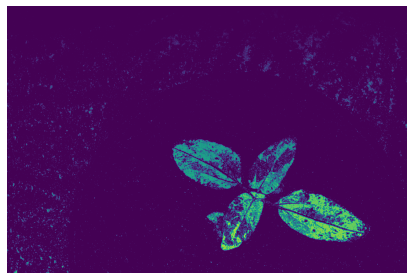

In [139]:
markers = rank.gradient(thresh_vi, disk(1)) < 12
markers = ndi.label(markers)[0]

plt.imshow(markers)
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_marker.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

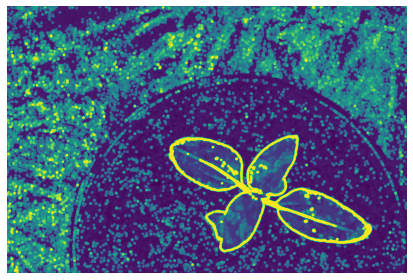

In [140]:
gradient = rank.gradient(thresh_vi, disk(10))
plt.imshow(gradient)
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_grad.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

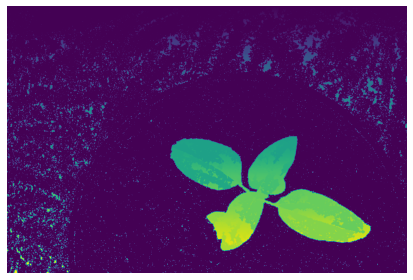

In [141]:
labels = watershed(gradient, markers)

plt.imshow(labels)
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_labels_color.png", dpi=300, transparent=True, bbox_inches="tight")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


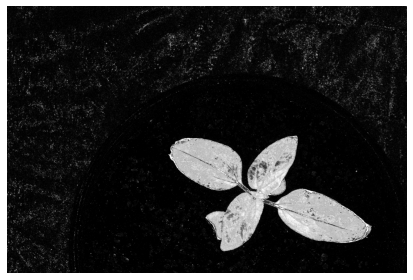

In [142]:
labels = watershed(gradient, markers)
seg1 = label(labels <= 0) 
labels = label2rgb(seg1, image=thresh_vi, bg_label=0)*2.5

plt.imshow(labels)
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_labeled.png", dpi=300, transparent=True, bbox_inches="tight")

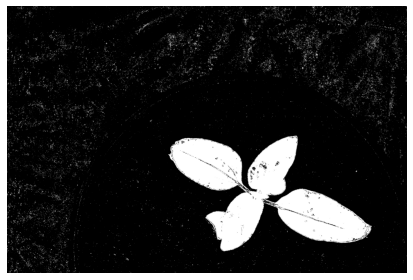

In [143]:
sigma = 0.00000
lb = rescale_intensity(labels, in_range=(-sigma, 1 + sigma),
                         out_range=(0, 1))
mask = np.where(lb <=0.3, 0, 1)

plt.imshow(mask*255)
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_masked.png", dpi=300, transparent=True, bbox_inches="tight")

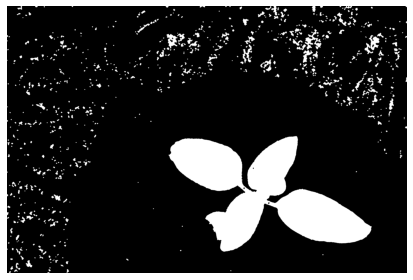

In [144]:
dil_erod_mask = dilate_erode(mask[:,:,0], kernel_size=3, dil_iters=5, eros_iters=5, hole_fill=False)

plt.imshow(dil_erod_mask, cmap="gray")
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_dil_eroded.png", dpi=300, transparent=True, bbox_inches="tight")

plt.show()

(2000, 3000)
255
int64


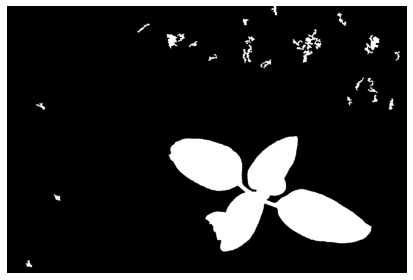

In [145]:
reduced_mask = reduce_holes(dil_erod_mask * 255) * 255

print(reduced_mask.shape)
print(reduced_mask.max())
print(reduced_mask.dtype)

plt.imshow(reduced_mask, cmap="gray")
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_reduced.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

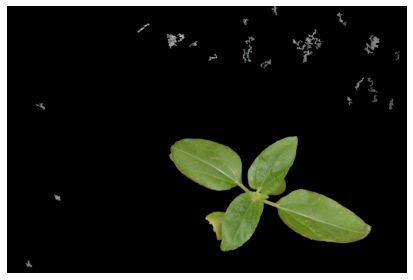

In [146]:
cutout = apply_mask(img, reduced_mask, "black")

plt.imshow(cutout)
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_cutout.png", dpi=300, transparent=True, bbox_inches="tight")


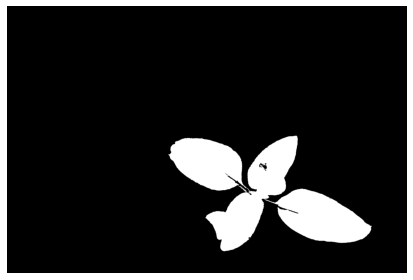

In [147]:
reduced_mask = reduce_holes(kmeans * 255) * 255

plt.imshow(reduced_mask, cmap="gray")
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_cutout_reduced_from_kmeans.png", dpi=300, transparent=True, bbox_inches="tight")

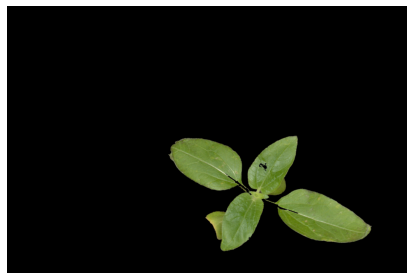

In [148]:
reduced_mask = reduce_holes(kmeans * 255) * 255
cutout = apply_mask(img, reduced_mask, "black")

plt.imshow(cutout)
plt.axis(False)
plt.tight_layout()
plt.savefig(f"{save_path}_{img_type}_cutout_kmeans.png", dpi=300, transparent=True, bbox_inches="tight")

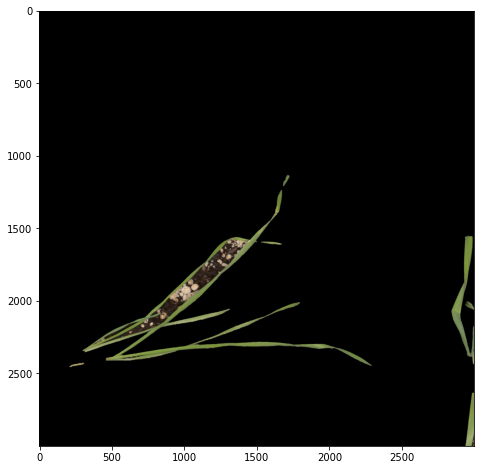

In [ ]:
# denoised = img_as_ubyte(vi)
denoised = vi
markers = rank.gradient(denoised, disk(1)) < 12
markers = ndi.label(markers)[0]
# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(10))
# process the watershed
labels = watershed(gradient, markers)
seg1 = label(labels <= 0)
labels = label2rgb(seg1, image=denoised, bg_label=0)*2.5
sigma = 0.00000
lb = rescale_intensity(labels, in_range=(-sigma, 1 + sigma),
                         out_range=(0, 1))
mask = np.where(lb <=0.3, 0., 255.)
mask = ndimage.binary_fill_holes(mask[:,:,0].astype(np.int32))
mask = dilate_erode(mask, kernel_size=3, dil_iters=5, eros_iters=5, hole_fill=True)
mask = reduce_holes(mask * 255) * 255
cutout = apply_mask(img, mask, "black")

plt.figure(figsize=(12,8))
plt.imshow(cutout)
plt.show()

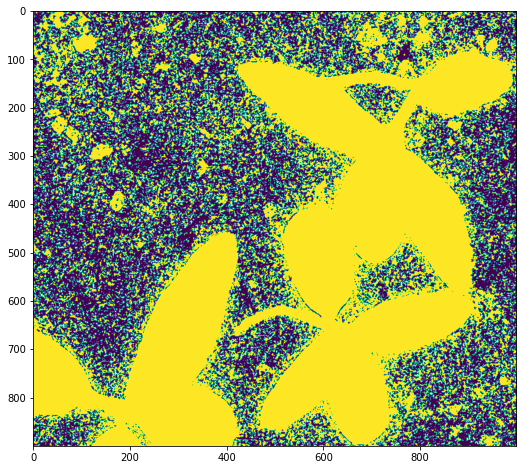

In [48]:
# sigma = 0.00000
# lb = rescale_intensity(labels, in_range=(-sigma, 1 + sigma),
#                          out_range=(0, 1))
mask = np.where(vi <=0, 0., 255.)
# mask = ndimage.binary_fill_holes(mask[:,:,0].astype(np.int32))
# mask = dilate_erode(mask, kernel_size=3, dil_iters=5, eros_iters=5, hole_fill=True)
# mask = reduce_holes(mask * 255) * 255
# cutout = apply_mask(img, mask, "black")

plt.figure(figsize=(12,8))
plt.imshow(mask)
plt.show()